# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# import api_keys
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city_name_l = []
cloud_l = []
country_l = []
date_l = []
humidity_l = []
lat = []
lng = []
maxtemp_l = []
wind_l = []

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q="

print("<------Beginning Data Retrieval Process------->")
#looping through each city
for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    #exception handling for "city not found"
    try:
        if response["message"] == "city not found":
            print("City not found. Skipping")
            
    except:
        print("Processing City: " + city)
        city_name_l.append(city)
        cloud_l.append(response["clouds"]["all"])
        country_l.append(response["sys"]["country"])
        date_l.append(response["dt"])
        humidity_l.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp_l.append(response["main"]["temp_max"])
        wind_l.append(response["wind"]["speed"])

print("----End Data Retrieval Process----")











<------Beginning Data Retrieval Process------->
Processing City: ugoofaaru
Processing City: bathsheba
Processing City: punta arenas
Processing City: naryan-mar
Processing City: cape town
Processing City: hobyo
Processing City: hilo
Processing City: mataura
Processing City: tura
Processing City: flin flon
City not found. Skipping
Processing City: nikolskoye
Processing City: martinez
Processing City: chuy
Processing City: busselton
Processing City: nantucket
Processing City: nuevo progreso
Processing City: jamestown
Processing City: derzhavinsk
Processing City: carnarvon
Processing City: atuona
Processing City: pacasmayo
City not found. Skipping
Processing City: luderitz
Processing City: linxia
Processing City: hofn
Processing City: puerto ayora
Processing City: mar del plata
Processing City: chicla
Processing City: cherskiy
Processing City: bluff
City not found. Skipping
Processing City: paracuru
Processing City: rikitea
Processing City: vaini
Processing City: nhulunbuy
Processing City:

Processing City: snyder
Processing City: huarmey
Processing City: suruc
Processing City: rawson
Processing City: marsabit
Processing City: tabuk
Processing City: nabire
Processing City: baza
Processing City: san quintin
Processing City: laguna
Processing City: xuddur
Processing City: riachao das neves
Processing City: mildura
Processing City: garowe
Processing City: houma
Processing City: port elizabeth
Processing City: borovoy
Processing City: west wendover
Processing City: brooks
Processing City: coahuayana
Processing City: bandundu
Processing City: meulaboh
City not found. Skipping
City not found. Skipping
Processing City: ghanaur
Processing City: bukachacha
Processing City: timmins
Processing City: inhambane
Processing City: geraldton
Processing City: hyeres
Processing City: birin
Processing City: conceicao do araguaia
Processing City: harbour breton
Processing City: zhigansk
City not found. Skipping
Processing City: nyborg
Processing City: nurota
Processing City: weihe
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_weather_df = pd.DataFrame({ 
                "City" : city_name_l,
                "Cloudiness" : cloud_l,
                "Country" : country_l,
                "Date" : date_l,
                "Humidity" : humidity_l,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : maxtemp_l,
                "Wind Speed" : wind_l
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ugoofaaru,34,MV,1612046598,70,5.6667,73.0000,80.89,9.28
1,bathsheba,40,BB,1612046633,65,13.2167,-59.5167,80.60,13.80
2,punta arenas,0,CL,1612046347,58,-53.1500,-70.9167,55.40,21.85
3,naryan-mar,100,RU,1612046633,93,67.6713,53.0870,3.18,11.83
4,cape town,75,ZA,1612046633,77,-33.9258,18.4232,71.01,1.14
...,...,...,...,...,...,...,...,...,...
551,san patricio,75,US,1612046771,61,28.0170,-97.5169,80.60,19.57
552,sandviken,71,SE,1612046772,73,60.6167,16.7667,12.00,4.00
553,bilma,36,NE,1612046772,30,18.6853,12.9164,58.24,3.13
554,dzaoudzi,0,YT,1612046773,78,-12.7887,45.2699,80.60,5.75


In [31]:
city_weather_df.to_csv("./cities_weather.csv")
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ugoofaaru,34,MV,1612046598,70,5.6667,73.0000,80.89,9.28
1,bathsheba,40,BB,1612046633,65,13.2167,-59.5167,80.60,13.80
2,punta arenas,0,CL,1612046347,58,-53.1500,-70.9167,55.40,21.85
3,naryan-mar,100,RU,1612046633,93,67.6713,53.0870,3.18,11.83
4,cape town,75,ZA,1612046633,77,-33.9258,18.4232,71.01,1.14


In [39]:


# df.loc[df['Type of ownership'] == '0']

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#No cities found where the humidity > 100%
city_weather_df.loc[city_weather_df['Humidity'] > 100,:]

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Temperature drops as latitude increases


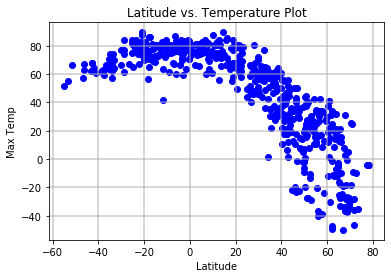

In [93]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "blue")

# Set title
plt.title("Latitude vs. Temperature Plot")

# Setting labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Set grid line
plt.grid(linewidth=2, alpha = 0.5)

# Save the fig
plt.savefig("../WeatherPy/City Latitude vs Temperature.png")
print("Temperature drops as latitude increases")

## Latitude vs. Humidity Plot

Humidty increases in the southern hemisphere


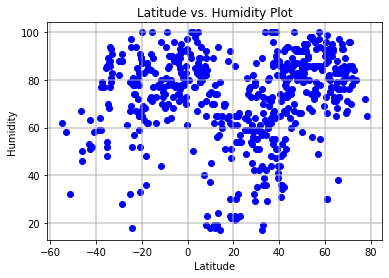

In [92]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "blue")

# Set title
plt.title("Latitude vs. Humidity Plot")

# Setting labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Set grid line
plt.grid(linewidth=2, alpha = 0.5)

# Save the fig
plt.savefig("../WeatherPy/City Latitude vs Humidity.png")
print("Humidty increases in the southern hemisphere")

## Latitude vs. Cloudiness Plot

Cloudiness is spread on the southern and northern hemisphere


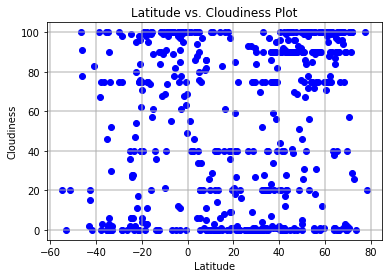

In [91]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "blue")

# Set title
plt.title("Latitude vs. Cloudiness Plot")

# Setting labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linewidth=2, alpha = 0.5)

# Save the fig
plt.savefig("../WeatherPy/City Latitude vs Cloudiness.png")
print("Cloudiness is spread on the southern and northern hemisphere")

## Latitude vs. Wind Speed Plot

Wind speed is widely spread across the latitude. There is no clear pattern


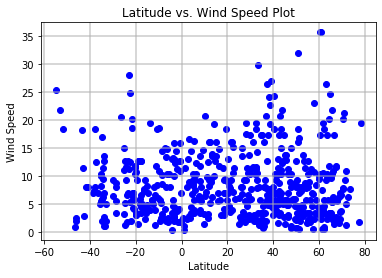

In [84]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "blue")

# Set title
plt.title("Latitude vs. Wind Speed Plot")

# Setting labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linewidth=2, alpha = 0.5)

# Save the fig
plt.savefig("../WeatherPy/City Latitude vs Wind Speed.png")
print("Wind speed is widely spread across the latitude. There is no clear pattern")
# Observation: wind speed is widely spread across the latitude. There is no clear pattern

## Linear Regression

In [94]:
northern_df = city_weather_df.loc[(city_weather_df['Lat']>0)]
southern_df = city_weather_df.loc[(city_weather_df['Lat'] < 0)]


City          166
Cloudiness    166
Country       166
Date          166
Humidity      166
Lat           166
Lng           166
Max Temp      166
Wind Speed    166
dtype: int64

In [70]:
def liner_reg(x_values, y_values,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8466504286344715


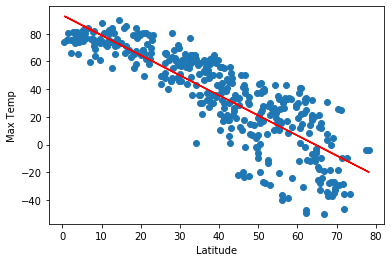

Negative Correlation between temp and latitude in Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [96]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
liner_reg(x_values,y_values,'Max Temp')
# plt.title("orthern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("Negative Correlation between temp and latitude in Northern Hemisphere")
# plt.annotate(line_eq,(6,10),fontsize=15,color="black")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.4960356424117767


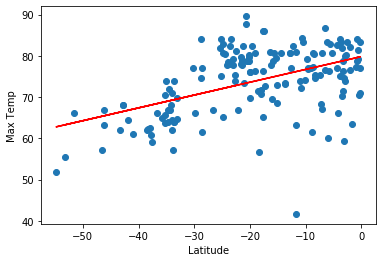

Postive Correlation between temp and latitude in Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [97]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
liner_reg(x_values,y_values,'Max Temp')

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("Postive Correlation between temp and latitude in Southern Hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.3077955755869836


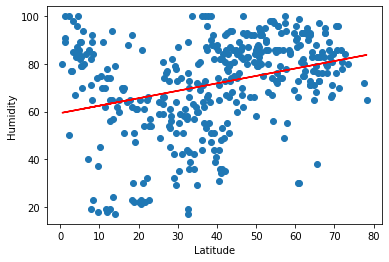

Moderate Positive Correlation between humidity and latitude in Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [98]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
liner_reg(x_values,y_values,'Humidity')

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regressio.png")
print("Moderate Positive Correlation between humidity and latitude in Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.3522639666198406


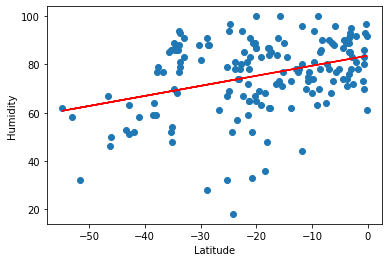

Moderate Positive Correlation between humidity and latitude in Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [99]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
liner_reg(x_values,y_values,'Humidity')

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print("Moderate Positive Correlation between humidity and latitude in Southern Hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.28204957137908154


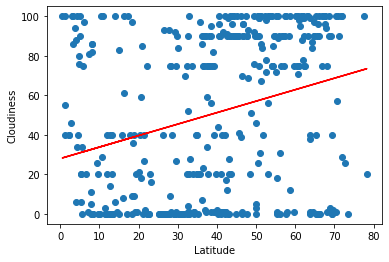

Weak Positive Correlation between cloudiness and latitude in Northern Hemisphere and Cloudiness is spread across the hemisphere


<Figure size 432x288 with 0 Axes>

In [101]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
liner_reg(x_values,y_values,'Cloudiness')

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio.png")
print("Weak Positive Correlation between cloudiness and latitude in Northern Hemisphere and Cloudiness is spread across the hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.4002513259764605


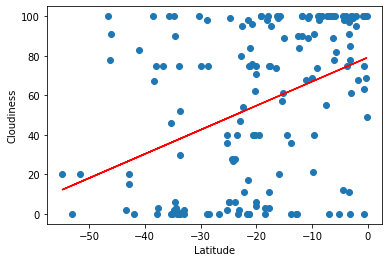

Positive Correlation between cloudiness and latitude in Southern Hemisphere and Cloudiness is spread across the hemisphere


<Figure size 432x288 with 0 Axes>

In [102]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
liner_reg(x_values,y_values,'Cloudiness')

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print("Positive Correlation between cloudiness and latitude in Southern Hemisphere and Cloudiness is spread across the hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.0251044220621812


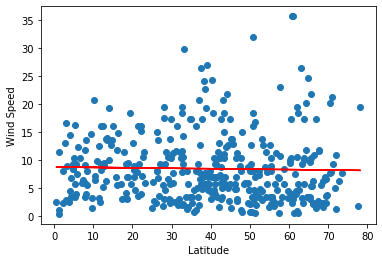

Weak Positive Correlation between wind speed and latitude in Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [104]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
liner_reg(x_values,y_values,'Wind Speed')

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regressio.png")
print("Weak Positive Correlation between wind speed and latitude in Northern Hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.14347756890254995


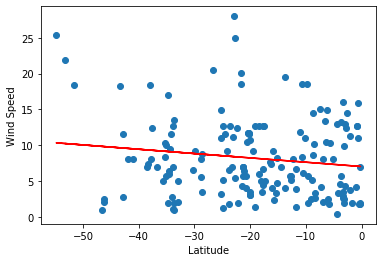

Negative Correlation between wind speed and latitude in Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [103]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
liner_reg(x_values,y_values,'Wind Speed')

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
print("Negative Correlation between wind speed and latitude in Southern Hemisphere")